# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

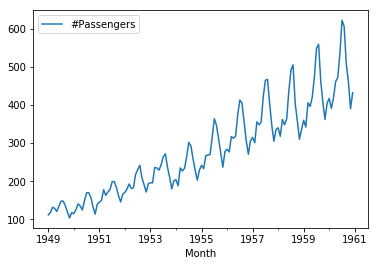

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

ts = pd.read_csv("passengers.csv")
ts.Month = pd.to_datetime(ts.Month)
ts.set_index("Month", inplace=True)
ts.plot();# Import necessary libraries

# Import passengers.csv and set it as a time-series object. Plot the TS


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [43]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):
    rolling_mean  = ts.rolling(window=8, center= False).mean()
    rolling_stdev = ts.rolling(window=8, center=False).std()
    plt.figure(figsize=(15,8))
    original = plt.plot(ts, color='yellow', label = 'Original')
    mean = plt.plot(rolling_mean, color="blue", label = "Rolling Mean")
    std = plt.plot(rolling_stdev, color='red', label= "Rolling STD")
    plt.legend()
    plt.show();
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Logs Used', '#Observations'])
    for key, val in dftest[4].items():
             dfoutput['Critical Value(%s)'%key] = val
    return plt.show(), dfoutput
    
                                
                                
                                
                                # Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab


Use your newly created function on the airpassenger data set.

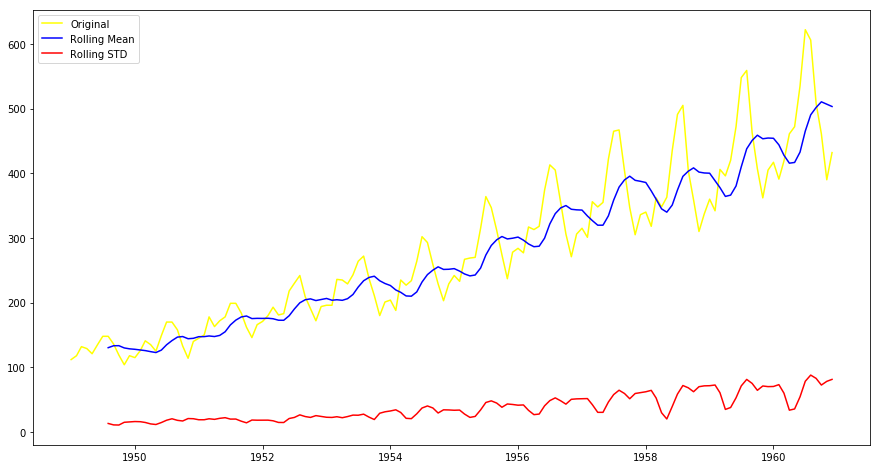

(None, Test Statistic           0.815369
 p-value                  0.991880
 #Logs Used              13.000000
 #Observations          130.000000
 Critical Value(1%)      -3.481682
 Critical Value(5%)      -2.884042
 Critical Value(10%)     -2.578770
 dtype: float64)

In [22]:
stationarity_check(ts)# Code here

## Perform a log() and sqrt() transform

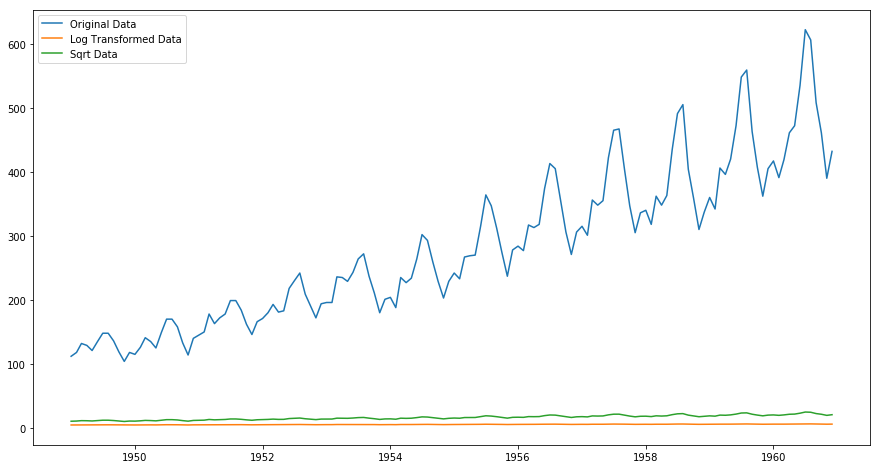

In [25]:
log_data = np.log(ts['#Passengers'])
sqrt_data = np.sqrt(ts['#Passengers'])

plt.figure(figsize = (15, 8))
plt.plot(ts, label="Original Data")
plt.plot(log_data, label = "Log Transformed Data")
plt.plot(sqrt_data, label = "Sqrt Data")# Log transform timeseries and compare with original to check the effect
plt.legend()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

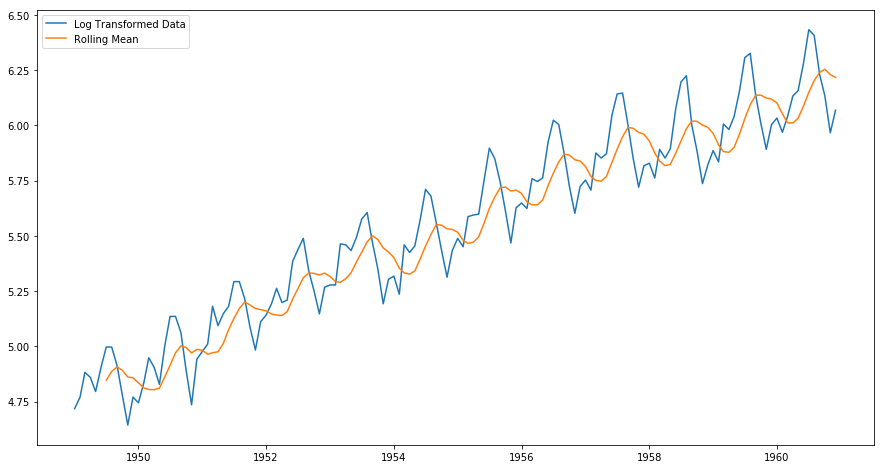

In [36]:
rolling_mean = log_data.rolling(window=7, center=False).mean()

plt.figure(figsize = (15, 8))
plt.plot(log_data, label = "Log Transformed Data")
plt.plot(rolling_mean, label = "Rolling Mean")
plt.legend()# your code here

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [39]:
data_minus_rolling_mean = log_data - rolling_mean
data_minus_rolling_mean.head()# Subtract the moving average from the original data and check head for Nans

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

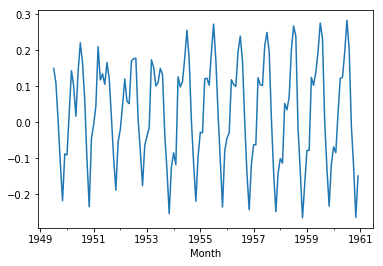

In [40]:
data_minus_rolling_mean.dropna(inplace=True)
data_minus_rolling_mean.plot()# Drop the NaN values from timeseries calculated above


In [41]:
# Plot the result


Finally, use your function `check_stationarity` to see if this series is considered stationary!

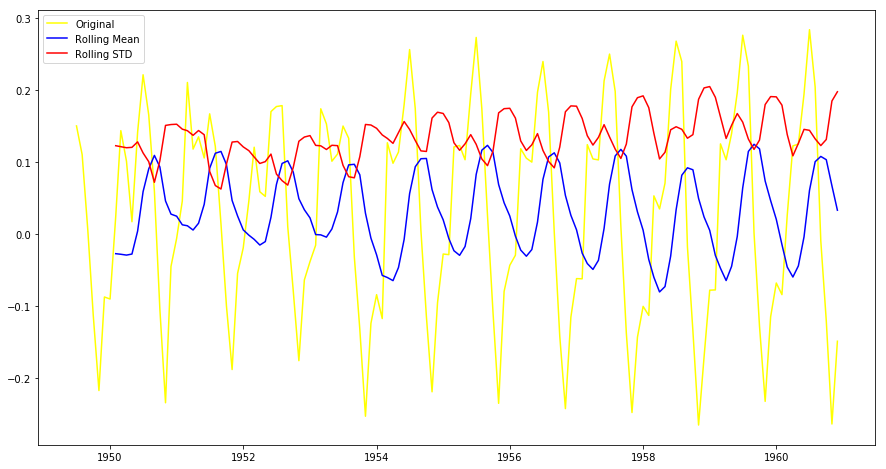

(None, Test Statistic          -2.348027
 p-value                  0.156946
 #Logs Used              14.000000
 #Observations          123.000000
 Critical Value(1%)      -3.484667
 Critical Value(5%)      -2.885340
 Critical Value(10%)     -2.579463
 dtype: float64)

In [44]:
stationarity_check(data_minus_rolling_mean)# Your code here

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
Still a pretty large p-value. Not stationary. # Your conclusion here

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

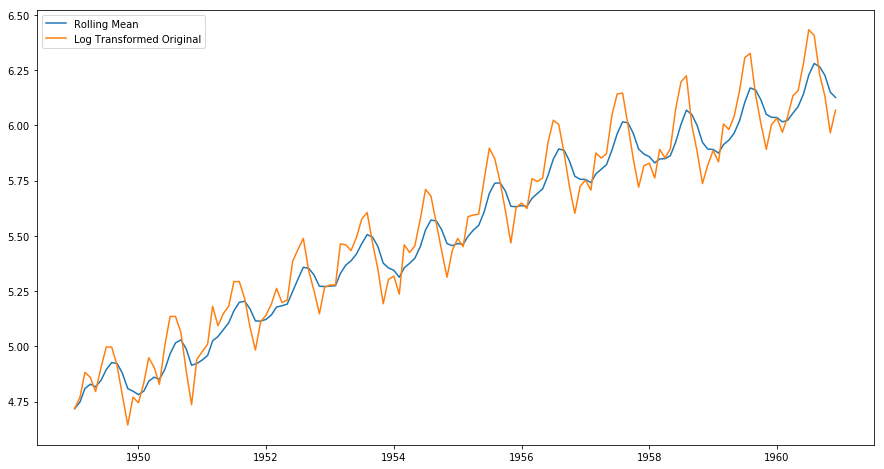

In [45]:
exp_rolmean = log_data.ewm(halflife=2).mean()

plt.figure(figsize=(15,8))
plt.plot(exp_rolmean, label='Rolling Mean')
plt.plot(log_data, label='Log Transformed Original')
plt.legend()
plt.show();# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

# Plot the original data with exp weighted average


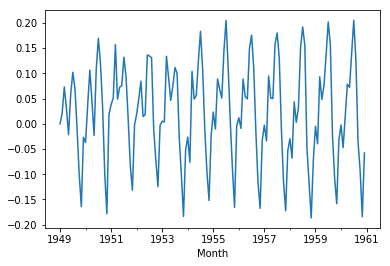

In [46]:
data_minus_exp_rolmean = log_data - exp_rolmean

data_minus_exp_rolmean.dropna(inplace=True)
data_minus_exp_rolmean.plot()# Subtract the moving average from the original data and plot

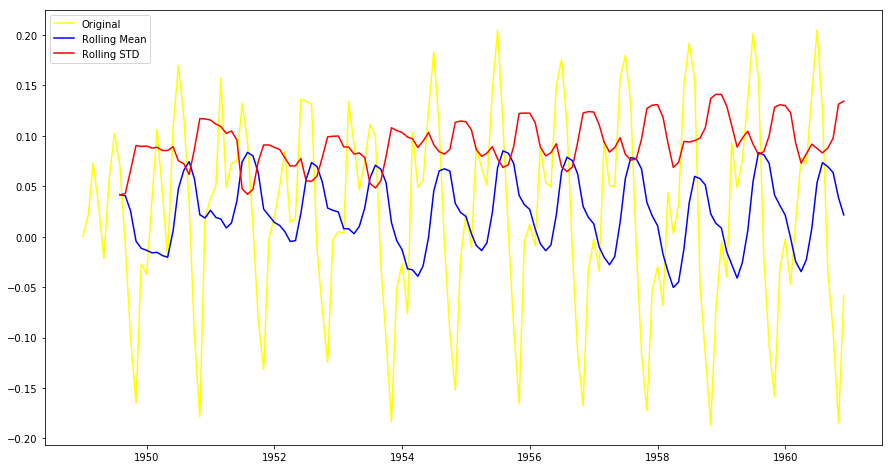

(None, Test Statistic          -3.087696
 p-value                  0.027477
 #Logs Used              13.000000
 #Observations          130.000000
 Critical Value(1%)      -3.481682
 Critical Value(5%)      -2.884042
 Critical Value(10%)     -2.578770
 dtype: float64)

In [48]:
stationarity_check(data_minus_exp_rolmean)# do a stationarity check

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


Finally it's stationary, though I can't tell from the plot. 

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [56]:
data_diff = data_minus_exp_rolmean.diff(periods=12)
data_diff.head()# difference your data and look at the head

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

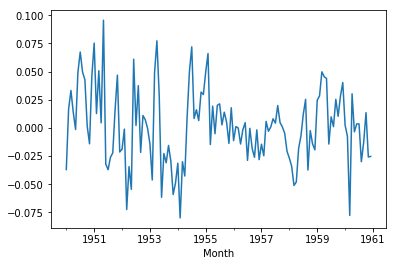

In [57]:
data_diff.dropna(inplace=True)
data_diff.plot()# plot your differenced time series

In [58]:
# drop nas

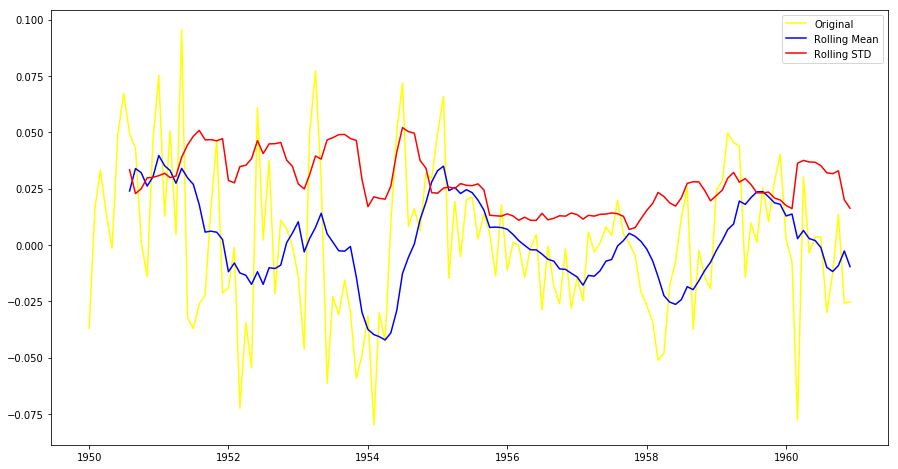

(None, Test Statistic          -4.158133
 p-value                  0.000775
 #Logs Used              12.000000
 #Observations          119.000000
 Critical Value(1%)      -3.486535
 Critical Value(5%)      -2.886151
 Critical Value(10%)     -2.579896
 dtype: float64)

In [59]:
stationarity_check(data_diff)# perform the stationarity check

### Your conclusion

It looks pretty wonky at this point and doesn't have a clear pattern. 

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.